In [3]:
from keras.datasets import mnist
(trn_img,trn_lbl),(tst_img,tst_lbl) = mnist.load_data()
[trn_img.shape,trn_lbl.shape,tst_img.shape,tst_lbl.shape]

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

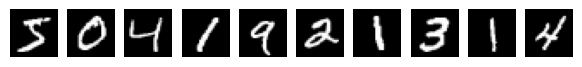

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))

for i in range(1,11):
    fig.add_subplot(1, 11, i)
    plt.axis("off")
    plt.imshow(trn_img[i-1], cmap="gray")

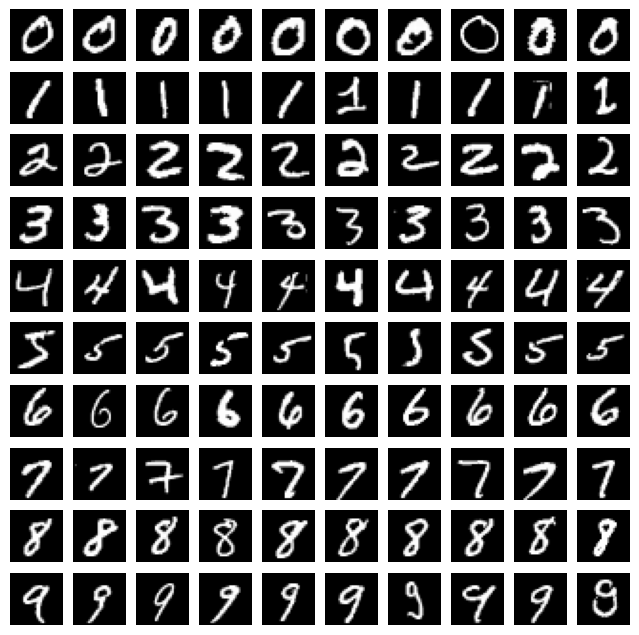

In [5]:
# images of digits  
fig  = plt.figure(figsize=(8, 8))
for dgt in range(10):
    lbls = [i for i, d in enumerate(trn_lbl) if d==dgt]
    for i in range(1,11):
        fig.add_subplot(10, 10, i+dgt*10)
        plt.axis("off")
        plt.imshow(trn_img[lbls[i-1]], cmap="gray")

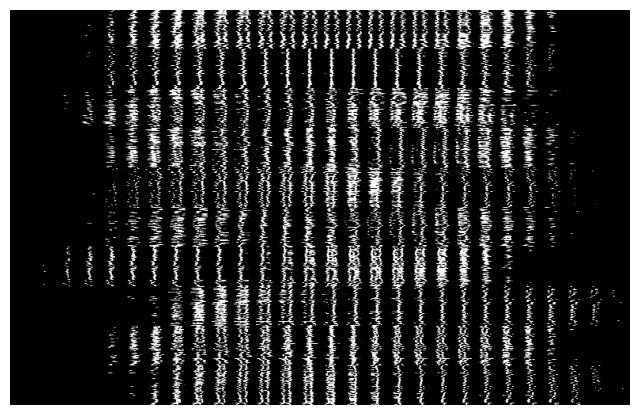

In [6]:
import numpy as np

# 이차원 배열 구조로 전환 : 각 숫자 이미지를 1차원 배열 형태로 변환
trn_imgf = trn_img.reshape((60000, 28 * 28))
tst_imgf = tst_img.reshape((10000, 28 * 28))

fig  = plt.figure(figsize=(8, 8))
imgf = np.empty((0,784))
# 각 수에 대한 50개 샘플에 대해서 784개의 행을 늘려서 그림. (각 숫자마다 50x784 사이즈임)
for dgt in range(10):
    lbls = [i for i, d in enumerate(trn_lbl) if d==dgt]
    for i in range(50):
        imgf = np.vstack((imgf, trn_imgf[lbls[i]]))
plt.axis("off")
plt.imshow(imgf, cmap="gray")

In [7]:
from sklearn import tree
treecls = tree.DecisionTreeClassifier()

# training 
treecls.fit(trn_imgf, trn_lbl)

# testing
pred_lbl = treecls.predict(tst_imgf)

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(tst_lbl, pred_lbl)
confmat

array([[ 915,    0,    5,    5,    2,   12,   16,    4,   11,   10],
       [   1, 1089,    9,    4,    4,    5,    6,    4,   12,    1],
       [  15,   10,  878,   33,   15,   12,   14,   23,   24,    8],
       [  12,    6,   32,  852,    7,   42,    3,    8,   22,   26],
       [   5,    2,   10,    3,  863,   13,   17,    4,   21,   44],
       [  11,    5,    3,   43,    7,  750,   21,    6,   28,   18],
       [  13,    4,   14,   12,   24,   19,  848,    1,   19,    4],
       [   3,   11,   20,   22,    4,    5,    1,  931,    6,   25],
       [   5,    3,   35,   41,   18,   32,   14,    9,  791,   26],
       [  13,    3,    6,   22,   43,   12,    6,   18,   21,  865]],
      dtype=int64)

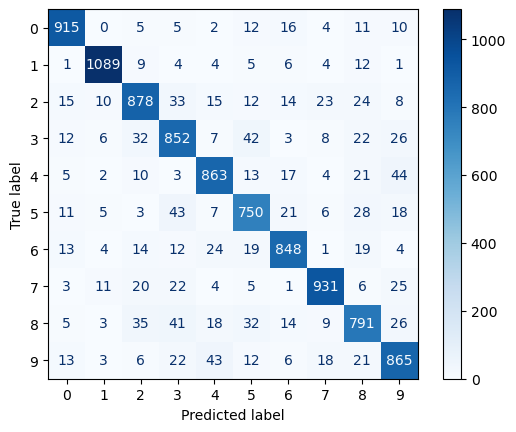

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confmat)
disp.plot(cmap="Blues")

In [9]:
# trace는 정확도(True Negative (TN)과 True Positive (TP))를 나타냄
np.trace(confmat)

8782

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(tst_lbl, pred_lbl)

0.8782

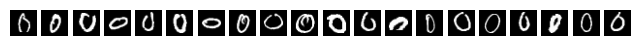

In [11]:
# 오분류된 숫자 이미지 확인 (숫자 0의 경우)
lbl0x = [i for i, d in enumerate(tst_lbl) if d==0 and tst_lbl[i] != pred_lbl[i]]
lbl0xd = [pred_lbl[i] for i, d in enumerate(tst_lbl)if d==0 and tst_lbl[i] != pred_lbl[i]]

fig = plt.figure(figsize=(8, 8))
for i in range(1,21):
    fig.add_subplot(1, 20, i)
    plt.axis("off")
    plt.imshow(tst_img[lbl0x[i-1]], cmap="gray")

In [12]:
# 숫자 0을 어떻게 인식했는지 확인
lbl0xd[:20]

[5, 6, 8, 3, 5, 9, 6, 8, 9, 8, 9, 6, 9, 2, 6, 6, 6, 8, 4, 6]

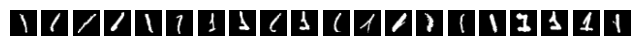

In [13]:
# 오분류된 숫자 이미지 확인 (숫자 1의 경우)
lbl1x = [i for i, d in enumerate(tst_lbl) if d==1 and tst_lbl[i] != pred_lbl[i]]
lbl1xd = [pred_lbl[i] for i, d in enumerate(tst_lbl)if d==1 and tst_lbl[i] != pred_lbl[i]]

fig = plt.figure(figsize=(8, 8))
for i in range(1,21):
    fig.add_subplot(1, 20, i)
    plt.axis("off")
    plt.imshow(tst_img[lbl1x[i-1]], cmap="gray")

In [14]:
# 숫자 1을 어떻게 인식했는지 확인
lbl1xd[:20]

[5, 6, 2, 8, 8, 7, 3, 8, 2, 8, 6, 5, 0, 2, 4, 4, 7, 6, 6, 4]

In [15]:
# Random Forest -> 몇개 샘플만으로 예측한 값을 투표해서 결정하는 방식
# 샘플 개수(n_estimators)는 전체 모수의 root 값을 사용하는 것이 일반적이다
 
from sklearn.ensemble import RandomForestClassifier
rfcls = RandomForestClassifier(n_estimators=28)

# training
rfcls.fit(trn_imgf, trn_lbl)

# testing
pred_lbl = rfcls.predict(tst_imgf)

from sklearn.metrics import accuracy_score
accuracy_score(tst_lbl, pred_lbl)

confmat = confusion_matrix(tst_lbl,pred_lbl)
confmat

array([[ 970,    0,    1,    1,    0,    3,    2,    1,    2,    0],
       [   0, 1122,    2,    4,    0,    2,    2,    0,    2,    1],
       [   5,    0,  997,    7,    2,    1,    3,   10,    6,    1],
       [   1,    0,   11,  963,    0,   14,    1,    8,    9,    3],
       [   1,    0,    3,    0,  949,    0,    5,    0,    2,   22],
       [   2,    1,    1,   20,    3,  850,    7,    1,    4,    3],
       [  10,    3,    1,    0,    5,    7,  929,    0,    2,    1],
       [   2,    2,   19,    3,    3,    0,    0,  989,    4,    6],
       [   5,    0,    7,    7,    4,   10,    4,    5,  922,   10],
       [   7,    4,    1,    7,   14,    7,    1,    4,    4,  960]],
      dtype=int64)

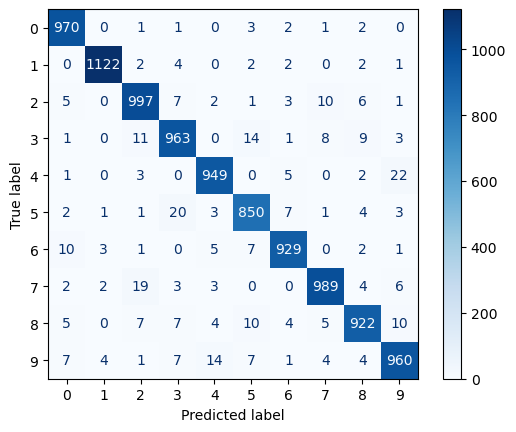

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confmat)
disp.plot(cmap="Blues")